In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import seaborn as sns
import math, time
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
import gc
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

In [2]:
key = "9e75e79c055470945cddfc527587d6ea600f5348"
#Google's initial public offering (IPO) took place on August 19, 2004.
df = pdr.get_data_tiingo('GOOGL',start='August 19, 2004', api_key=key)
df.to_csv('GOOGL.csv')

d:\Software\miniconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [3]:
df=pd.read_csv('GOOGL.csv')

In [4]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19 00:00:00+00:00,100.335,104.06,95.960,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20 00:00:00+00:00,108.310,109.08,100.500,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23 00:00:00+00:00,109.400,113.48,109.050,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24 00:00:00+00:00,104.870,111.60,103.570,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25 00:00:00+00:00,106.000,108.00,103.880,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,GOOGL,2022-11-17 00:00:00+00:00,98.360,99.28,96.790,96.97,26052599,98.360000,99.280000,96.790000,96.970000,26052599,0.0,1.0
4596,GOOGL,2022-11-18 00:00:00+00:00,97.430,98.90,96.370,98.77,28342297,97.430000,98.900000,96.370000,98.770000,28342297,0.0,1.0
4597,GOOGL,2022-11-21 00:00:00+00:00,95.600,98.40,95.355,97.29,21647387,95.600000,98.400000,95.355000,97.290000,21647387,0.0,1.0
4598,GOOGL,2022-11-22 00:00:00+00:00,97.050,97.22,94.050,95.95,23438480,97.050000,97.220000,94.050000,95.950000,23438480,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4600 non-null   object 
 1   date         4600 non-null   object 
 2   close        4600 non-null   float64
 3   high         4600 non-null   float64
 4   low          4600 non-null   float64
 5   open         4600 non-null   float64
 6   volume       4600 non-null   int64  
 7   adjClose     4600 non-null   float64
 8   adjHigh      4600 non-null   float64
 9   adjLow       4600 non-null   float64
 10  adjOpen      4600 non-null   float64
 11  adjVolume    4600 non-null   int64  
 12  divCash      4600 non-null   float64
 13  splitFactor  4600 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 503.2+ KB


In [6]:
df['date'] = df['date'].str.split(' ').str[0]

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19,100.335,104.06,95.960,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20,108.310,109.08,100.500,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23,109.400,113.48,109.050,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24,104.870,111.60,103.570,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25,106.000,108.00,103.880,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,GOOGL,2022-11-17,98.360,99.28,96.790,96.97,26052599,98.360000,99.280000,96.790000,96.970000,26052599,0.0,1.0
4596,GOOGL,2022-11-18,97.430,98.90,96.370,98.77,28342297,97.430000,98.900000,96.370000,98.770000,28342297,0.0,1.0
4597,GOOGL,2022-11-21,95.600,98.40,95.355,97.29,21647387,95.600000,98.400000,95.355000,97.290000,21647387,0.0,1.0
4598,GOOGL,2022-11-22,97.050,97.22,94.050,95.95,23438480,97.050000,97.220000,94.050000,95.950000,23438480,0.0,1.0


In [8]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.set_index('date')

In [10]:
df

,adjClose
date,
2004-08-19,2.516142
2004-08-20,2.716134
2004-08-23,2.743469
2004-08-24,2.629868
2004-08-25,2.658206
...,...
2022-11-17,98.360000
2022-11-18,97.430000
2022-11-21,95.600000


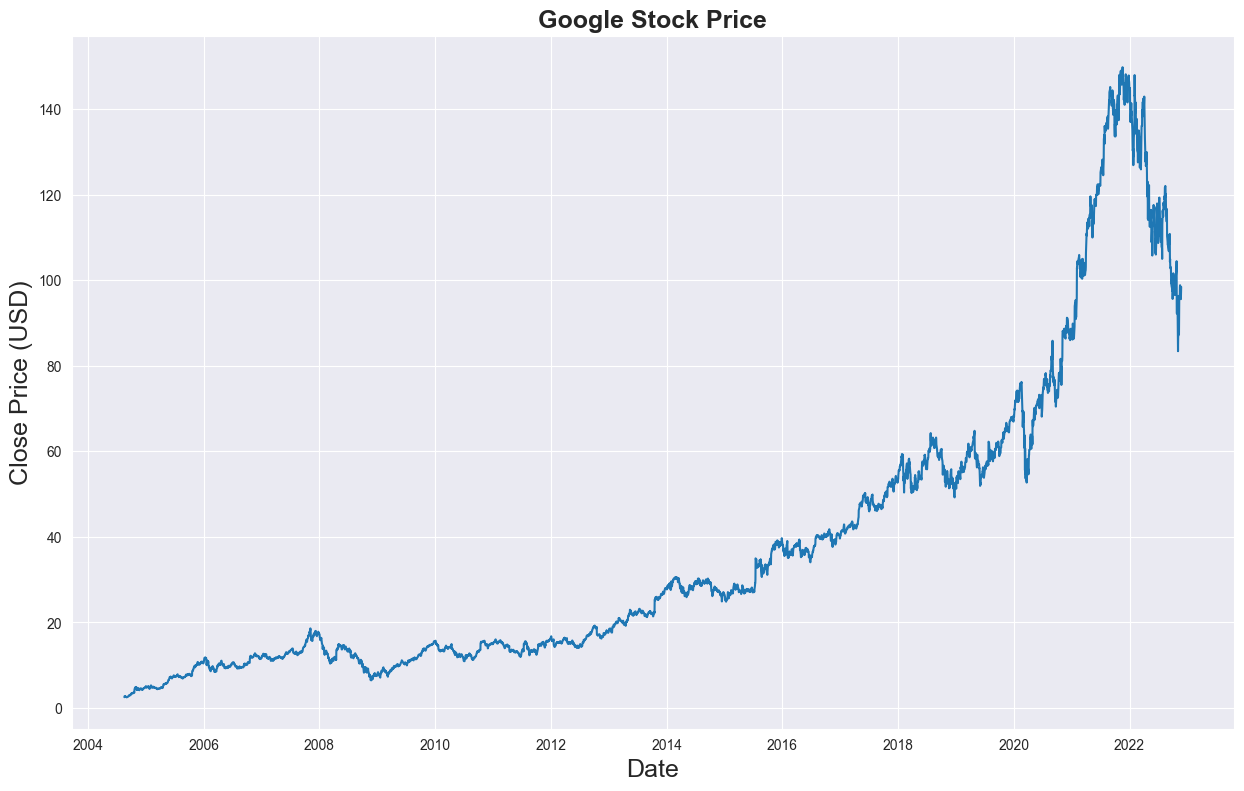

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [12]:
#array of original prices data
df_prices = df['adjClose'].values.reshape(-1,1)

In [13]:
df_prices

array([[ 2.51614209],
       [ 2.71613445],
       [ 2.74346883],
       ...,
       [95.6       ],
       [97.05      ],
       [98.46      ]])

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [15]:
device = get_default_device()
device

device(type='cuda')

In [16]:
# convert an array of values into sequences according to window size
def create_sequence(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [17]:
# convert an array of values into a dataset matrix
def curate_dataset(dataset, time_step):

	##splitting dataset into train valid test split
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	#scaling the data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	val_data['adjClose'] = scaler.transform(np.array(val_data['adjClose']).reshape(-1, 1))
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_sequence(train_data, time_step)
	X_val, y_val = create_sequence(val_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)	
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [18]:
# convert an array of values into a dataset matrix
def curate_dataset_test(dataset, time_step):

	##splitting dataset into train  test split
	train_size = round(len(dataset) * 0.90)
	train_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:, :]

	#scaling the data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_sequence(train_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_test, y_train, y_test, scaler

In [19]:
# Create a base (or vanilla) RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'tanh')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [20]:
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()       

        # Reset gradients
        optimiser.zero_grad()     

        # Compute gradients
        loss.backward()

        # Update parameters           
        optimiser.step()        
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    print()
    
    return hist, y_train_pred

In [21]:
def plot_predictions(pred, true):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(12, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(x = true.index, y = true[0], label="Data", color='royalblue')
    ax = sns.lineplot(x = pred.index, y = pred[0], label="Training Prediction", color='tomato')
    ax.set_title('Stock price', size = 14, fontweight='bold')
    ax.set_xlabel("Days", size = 14)
    ax.set_ylabel("Cost (USD)", size = 14)
    ax.set_xticklabels('', size=10)

In [22]:
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')

In [23]:
def plotly_predictions(results):  
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [24]:
def evaluate_model_experiments(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred
  
    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)

    #getting and appending the results to the results list
    metadata = [[time_step, model.layer_dim, model.hidden_dim, trainScore, valScore]]
    metadata = pd.DataFrame(metadata, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'])   
        
    return metadata

In [25]:
def evaluate_single_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred


    original = df[0 : end_of_time]    
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)    
    return None

In [26]:
def test_final_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_test, y_train, y_test, scaler = curate_dataset_test(df, time_step)
    X_train = torch_data(X_train, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_test_pred = model(X_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_test_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_test_pred

   
    original = df[0 : end_of_time]    
    predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)    
    return None

## Vanilla RNN

Epoch  0 MSE:  0.1769380122423172
Epoch  1 MSE:  0.1637599766254425
Epoch  2 MSE:  0.15144476294517517
Epoch  3 MSE:  0.14000454545021057
Epoch  4 MSE:  0.12944722175598145
Epoch  5 MSE:  0.11977575719356537
Epoch  6 MSE:  0.11098756641149521
Epoch  7 MSE:  0.10307387262582779
Epoch  8 MSE:  0.09601917117834091
Epoch  9 MSE:  0.08980081975460052
Epoch  10 MSE:  0.0843886286020279
Epoch  11 MSE:  0.07974502444267273
Epoch  12 MSE:  0.07582518458366394
Epoch  13 MSE:  0.07257778942584991
Epoch  14 MSE:  0.06994602829217911
Epoch  15 MSE:  0.06786908954381943
Epoch  16 MSE:  0.06628372520208359
Epoch  17 MSE:  0.06512604653835297
Epoch  18 MSE:  0.06433314085006714
Epoch  19 MSE:  0.06384444981813431
Epoch  20 MSE:  0.06360287219285965
Epoch  21 MSE:  0.06355545669794083
Epoch  22 MSE:  0.06365388631820679
Epoch  23 MSE:  0.06385477632284164
Epoch  24 MSE:  0.06411982327699661
Epoch  25 MSE:  0.06441592425107956
Epoch  26 MSE:  0.064715176820755
Epoch  27 MSE:  0.06499485671520233
Epoch  

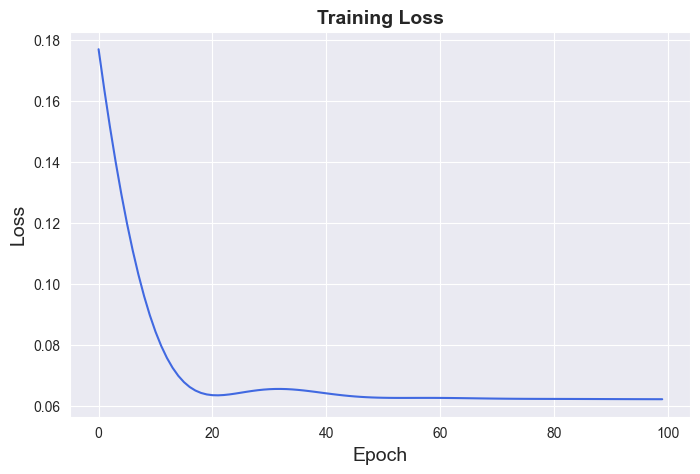

In [27]:
#parameters for vanilla RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
vanilla_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
vanilla_rnn = to_device(vanilla_rnn, device)

#training and evaluating model
evaluate_single_model(vanilla_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# Experiments with RNN

## Using ReLU as the non-linearity in RNN

In [28]:
# RNN model with relu as nonlinearity
class RNN_relu(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_relu, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

Epoch  0 MSE:  1.954759955406189
Epoch  1 MSE:  1.5666656494140625
Epoch  2 MSE:  1.2596317529678345
Epoch  3 MSE:  1.0172398090362549
Epoch  4 MSE:  0.8259379267692566
Epoch  5 MSE:  0.6747797131538391
Epoch  6 MSE:  0.555070161819458
Epoch  7 MSE:  0.4599820077419281
Epoch  8 MSE:  0.3841939866542816
Epoch  9 MSE:  0.3235739469528198
Epoch  10 MSE:  0.2749161720275879
Epoch  11 MSE:  0.235730841755867
Epoch  12 MSE:  0.20407913625240326
Epoch  13 MSE:  0.1784457117319107
Epoch  14 MSE:  0.15764103829860687
Epoch  15 MSE:  0.14072701334953308
Epoch  16 MSE:  0.12696005403995514
Epoch  17 MSE:  0.11574779450893402
Epoch  18 MSE:  0.10661597549915314
Epoch  19 MSE:  0.09918304532766342
Epoch  20 MSE:  0.09314051270484924
Epoch  21 MSE:  0.08823791891336441
Epoch  22 MSE:  0.08427098393440247
Epoch  23 MSE:  0.08107247948646545
Epoch  24 MSE:  0.0785050019621849
Epoch  25 MSE:  0.07645527273416519
Epoch  26 MSE:  0.07482966035604477
Epoch  27 MSE:  0.07355058193206787
Epoch  28 MSE:  0.0

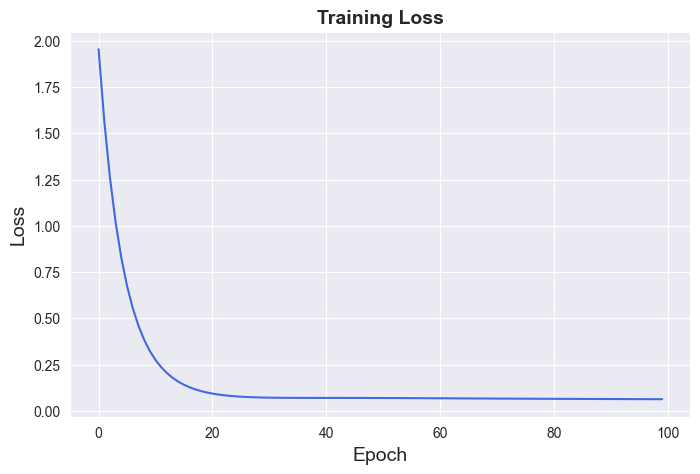

In [29]:
#parameters for RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
relu_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
relu_rnn = to_device(relu_rnn, device)

#training and evaluating model
evaluate_single_model(relu_rnn, num_epochs, lr, loss_type, optimiser, time_step)

In [30]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

tanh_results = []
relu_results = []
for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the tanh RNN model
            torch.manual_seed(42)
            tanh_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            tanh_rnn = to_device(tanh_rnn, device)
            #training and evaluating model
            tanh_res = evaluate_model_experiments(tanh_rnn, num_epochs, lr, loss_type, optimiser, time_step)
            tanh_results += [tanh_res.iloc[0]]
            print()

            #declaring the tanh RNN model
            relu_rnn_exp = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            relu_rnn_exp = to_device(relu_rnn_exp, device)
            #training and evaluating model
            relu_res = evaluate_model_experiments(relu_rnn_exp, num_epochs, lr, loss_type, optimiser, time_step)
            relu_results += [relu_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Epoch  0 MSE:  0.20318560302257538
Epoch  1 MSE:  0.17353446781635284
Epoch  2 MSE:  0.1466338187456131
Epoch  3 MSE:  0.1225547045469284
Epoch  4 MSE:  0.10132244229316711
Epoch  5 MSE:  0.08291207998991013
Epoch  6 MSE:  0.06725005060434341
Epoch  7 MSE:  0.054219361394643784
Epoch  8 MSE:  0.04366738349199295
Epoch  9 MSE:  0.035413958132267
Epoch  10 MSE:  0.029257740825414658
Epoch  11 MSE:  0.02497929148375988
Epoch  12 MSE:  0.022340958938002586
Epoch  13 MSE:  0.02108517289161682
Epoch  14 MSE:  0.020933862775564194
Epoch  15 MSE:  0.021591681987047195
Epoch  16 MSE:  0.0227544866502285
Epoch  17 MSE:  0.02412337251007557
Epoch  18 MSE:  0.025423211976885796
Epoch  19 MSE:  0.02642323076725006
Epoch  20 MSE:  0.026955336332321167
Epoch  21 MSE:  0.026925403624773026
Epoch  22 MSE:  0.026314308866858482
Epoch  23 MSE:  0.0251687690615654
Epoch  24 MSE:  0.02358495257794857
Epoch  25 MSE:  0.021688906475901604
Epoch  26 MSE:  0

In [31]:
tanh_results = pd.DataFrame(tanh_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)
relu_results = pd.DataFrame(relu_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [32]:
tanh_results = tanh_results.sort_values('valScore', ascending=True, ignore_index = True)  
tanh_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,20.0,1.0,32.0,0.584620,3.833782
1,30.0,1.0,32.0,0.584536,3.866277
2,50.0,1.0,32.0,0.585364,3.947468
3,20.0,2.0,32.0,0.569374,4.175969
4,100.0,1.0,32.0,0.589626,4.180090
5,30.0,2.0,32.0,0.574430,4.247991
6,50.0,2.0,32.0,0.575760,4.339213
7,100.0,2.0,32.0,0.578460,4.631623
8,20.0,1.0,16.0,0.668459,5.376113
9,30.0,1.0,16.0,0.671980,5.456024


In [33]:
relu_results = relu_results.sort_values('valScore', ascending=True, ignore_index = True)
relu_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,20.0,1.0,32.0,0.585494,1.470166
1,30.0,1.0,32.0,0.584872,1.483170
2,50.0,1.0,32.0,0.587368,1.486571
3,100.0,1.0,32.0,0.584710,1.506800
4,20.0,1.0,16.0,0.485333,1.548627
5,20.0,2.0,32.0,0.531489,1.559263
6,30.0,2.0,32.0,0.510605,1.651218
7,100.0,2.0,32.0,0.555022,1.703323
8,20.0,2.0,16.0,0.592587,1.799697
9,30.0,2.0,16.0,0.606538,1.807348


In [34]:
best_model = relu_results.iloc[0]
best_model

time_step     20.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.585494
valScore       1.470166
Name: 0, dtype: float64

Epoch  0 MSE:  0.15050962567329407
Epoch  1 MSE:  0.07974391430616379
Epoch  2 MSE:  0.05579213425517082
Epoch  3 MSE:  0.06499283760786057
Epoch  4 MSE:  0.06381278485059738
Epoch  5 MSE:  0.05235466733574867
Epoch  6 MSE:  0.045319028198719025
Epoch  7 MSE:  0.04463496804237366
Epoch  8 MSE:  0.045913439244031906
Epoch  9 MSE:  0.04513629525899887
Epoch  10 MSE:  0.04150551185011864
Epoch  11 MSE:  0.03645125404000282
Epoch  12 MSE:  0.03197847306728363
Epoch  13 MSE:  0.029461927711963654
Epoch  14 MSE:  0.028658663854002953
Epoch  15 MSE:  0.02723107673227787
Epoch  16 MSE:  0.023637013509869576
Epoch  17 MSE:  0.018823375925421715
Epoch  18 MSE:  0.014831994660198689
Epoch  19 MSE:  0.012497201561927795
Epoch  20 MSE:  0.01054177712649107
Epoch  21 MSE:  0.0068034399300813675
Epoch  22 MSE:  0.0024484326131641865
Epoch  23 MSE:  0.0014311968116089702
Epoch  24 MSE:  0.002842467511072755
Epoch  25 MSE:  0.002008236013352871
Epoch  26 MSE:  0.002385384403169155
Epoch  27 MSE:  0.004

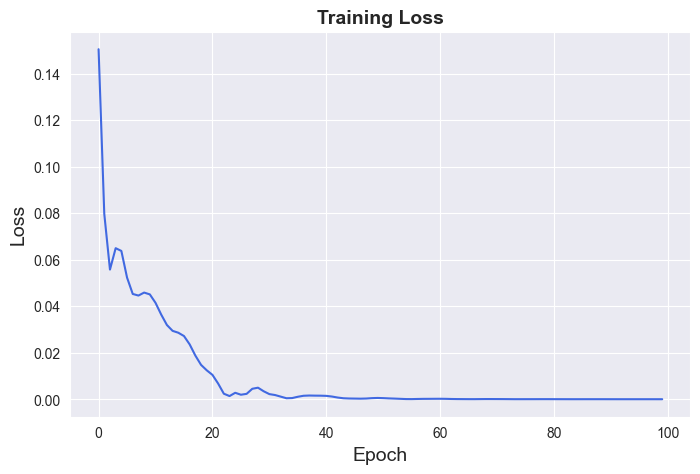

In [35]:
# Retraining our model with tuned parameters

#constant parameters as used in a vanilla RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_model['hidden_dim'])
num_layers = int(best_model['num_layers'])
time_step = int(best_model['time_step'])

#declaring the model
torch.manual_seed(42)
tuned_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_rnn = to_device(tuned_rnn, device)

#training and evaluating model
evaluate_single_model(tuned_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# LSTM Model

In [36]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [37]:
gc.collect()
torch.cuda.empty_cache()

Epoch  0 MSE:  0.19933846592903137
Epoch  1 MSE:  0.13358336687088013
Epoch  2 MSE:  0.08571717143058777
Epoch  3 MSE:  0.05233769863843918
Epoch  4 MSE:  0.04366301745176315
Epoch  5 MSE:  0.06582004576921463
Epoch  6 MSE:  0.052310168743133545
Epoch  7 MSE:  0.03882328048348427
Epoch  8 MSE:  0.03507784381508827
Epoch  9 MSE:  0.03591817617416382
Epoch  10 MSE:  0.037165865302085876
Epoch  11 MSE:  0.036830201745033264
Epoch  12 MSE:  0.034234996885061264
Epoch  13 MSE:  0.02947648987174034
Epoch  14 MSE:  0.023263392969965935
Epoch  15 MSE:  0.017102405428886414
Epoch  16 MSE:  0.013680122792720795
Epoch  17 MSE:  0.015435507521033287
Epoch  18 MSE:  0.015383945778012276
Epoch  19 MSE:  0.007697439752519131
Epoch  20 MSE:  0.0034602980595082045
Epoch  21 MSE:  0.004767749458551407
Epoch  22 MSE:  0.0065038492903113365
Epoch  23 MSE:  0.005366078577935696
Epoch  24 MSE:  0.003119820961728692
Epoch  25 MSE:  0.00502018490806222
Epoch  26 MSE:  0.006413355469703674
Epoch  27 MSE:  0.00

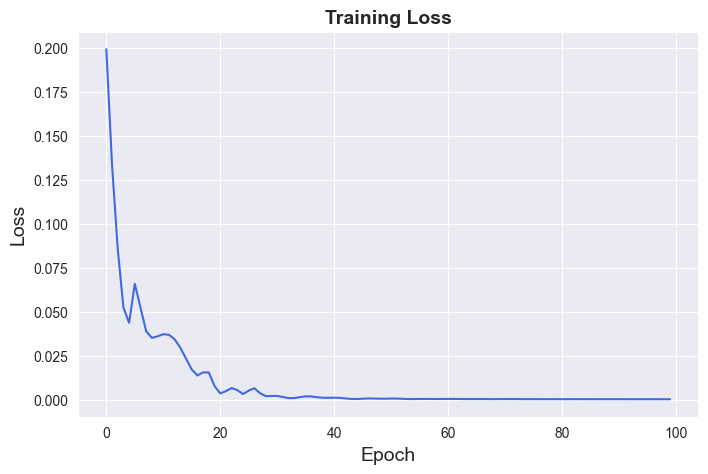

In [38]:
#parameters
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam
time_step = 50

#declaring the model
torch.manual_seed(42)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
evaluate_single_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

# GRU

In [39]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [40]:
gc.collect()
torch.cuda.empty_cache()

Epoch  0 MSE:  0.1622062474489212
Epoch  1 MSE:  0.09375353902578354
Epoch  2 MSE:  0.05602359399199486
Epoch  3 MSE:  0.04917905479669571
Epoch  4 MSE:  0.058183733373880386
Epoch  5 MSE:  0.04916078597307205
Epoch  6 MSE:  0.03582856059074402
Epoch  7 MSE:  0.02816852740943432
Epoch  8 MSE:  0.025258487090468407
Epoch  9 MSE:  0.023490475490689278
Epoch  10 MSE:  0.019852058961987495
Epoch  11 MSE:  0.013373003341257572
Epoch  12 MSE:  0.005858303513377905
Epoch  13 MSE:  0.0021723031532019377
Epoch  14 MSE:  0.006341172847896814
Epoch  15 MSE:  0.0063370647840201855
Epoch  16 MSE:  0.0013692425563931465
Epoch  17 MSE:  0.0029190729837864637
Epoch  18 MSE:  0.006434831768274307
Epoch  19 MSE:  0.0057090893387794495
Epoch  20 MSE:  0.0022826967760920525
Epoch  21 MSE:  0.00039523784653283656
Epoch  22 MSE:  0.0014453220646828413
Epoch  23 MSE:  0.002757149050012231
Epoch  24 MSE:  0.0021893009543418884
Epoch  25 MSE:  0.0008816447225399315
Epoch  26 MSE:  0.0004433326830621809
Epoch  

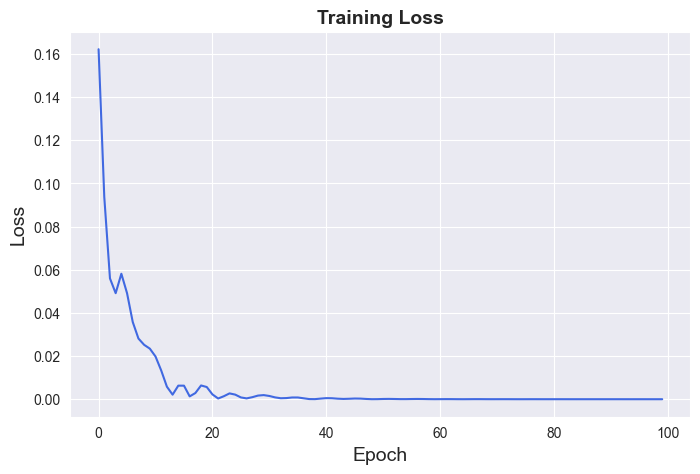

In [41]:
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
time_step = 50
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#declaring the model
torch.manual_seed(42)
gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
gru = to_device(gru, device)

#training and evaluating model
evaluate_single_model(gru, num_epochs, lr, loss_type, optimiser, time_step)

# Testing the Final Model

Epoch  0 MSE:  0.11859279870986938
Epoch  1 MSE:  0.0661514401435852
Epoch  2 MSE:  0.04283852502703667
Epoch  3 MSE:  0.04456273466348648
Epoch  4 MSE:  0.04733928292989731
Epoch  5 MSE:  0.03866111487150192
Epoch  6 MSE:  0.028990186750888824
Epoch  7 MSE:  0.023320836946368217
Epoch  8 MSE:  0.0209068451076746
Epoch  9 MSE:  0.018983516842126846
Epoch  10 MSE:  0.014990214258432388
Epoch  11 MSE:  0.008494903333485126
Epoch  12 MSE:  0.0023914207704365253
Epoch  13 MSE:  0.002985884202644229
Epoch  14 MSE:  0.007590576075017452
Epoch  15 MSE:  0.0026372279971837997
Epoch  16 MSE:  0.0017849712166935205
Epoch  17 MSE:  0.005098453722894192
Epoch  18 MSE:  0.005173877347260714
Epoch  19 MSE:  0.0022681057453155518
Epoch  20 MSE:  0.00018051199731417
Epoch  21 MSE:  0.0007621177355758846
Epoch  22 MSE:  0.0023207347840070724
Epoch  23 MSE:  0.0024885956663638353
Epoch  24 MSE:  0.001428332761861384
Epoch  25 MSE:  0.000637462071608752
Epoch  26 MSE:  0.0007698456174694002
Epoch  27 MSE

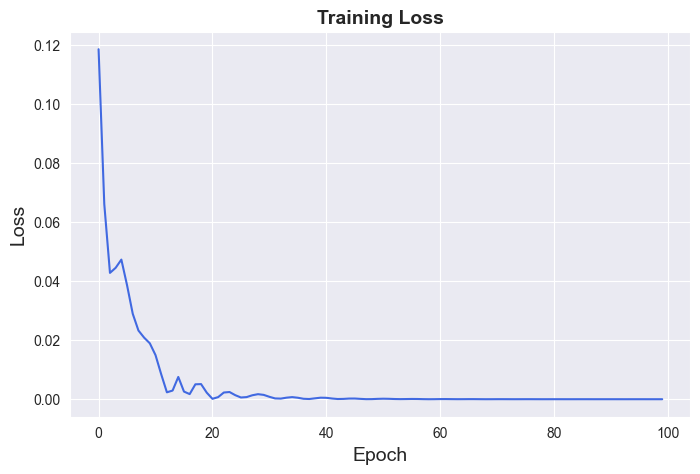

In [42]:
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
time_step = 50
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#declaring the model
torch.manual_seed(42)
final_model = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
final_model = to_device(final_model, device)

#training and evaluating model
test_final_model(final_model, num_epochs, lr, loss_type, optimiser, time_step)

Visit https://nbviewer.org/github/Satpat/Sequential-networks-for-Stonks/blob/main/final_code_git.ipynb for viewing plotly graphs which plot the predictions.